This is a copy of `visualize_mpi.jl` in Jupyter -- for those folks that aren't using the shell

In [1]:
using CairoMakie
using JLD2

In [2]:
function vizme2D_mpi(nprocs)
    C = []
    lx = ly = 0.0
    ip = 1
    for ipx in 1:nprocs[1]
        for ipy in 1:nprocs[2]
            C_loc, lxy = load(joinpath(@__DIR__, "out_$(ip-1).jld2"), "C", "lxy")
            nx_i, ny_i = size(C_loc, 1), size(C_loc, 2)
            ix1, iy1 = 1 + (ipx - 1) * nx_i, 1 + (ipy - 1) * ny_i
            if ip == 1
                C = zeros(nprocs[1] * nx_i, nprocs[2] * ny_i)
                lx, ly = lxy
            end
            C[ix1:ix1+nx_i-1, iy1:iy1+ny_i-1] .= C_loc
            ip += 1
        end
    end
    xc, yc = LinRange.(0, (lx, ly), size(C))
    fig = Figure(; size=(500, 400), fontsize=14)
    ax  = Axis(fig[1, 1][1, 1]; aspect=DataAspect(), title="C")
    hm  = heatmap!(ax, xc, yc, C; colormap=:turbo, colorrange=(0, 1))
    cb  = Colorbar(fig[1, 1][1, 2], hm)
    display(fig)
    return
end

vizme2D_mpi (generic function with 1 method)

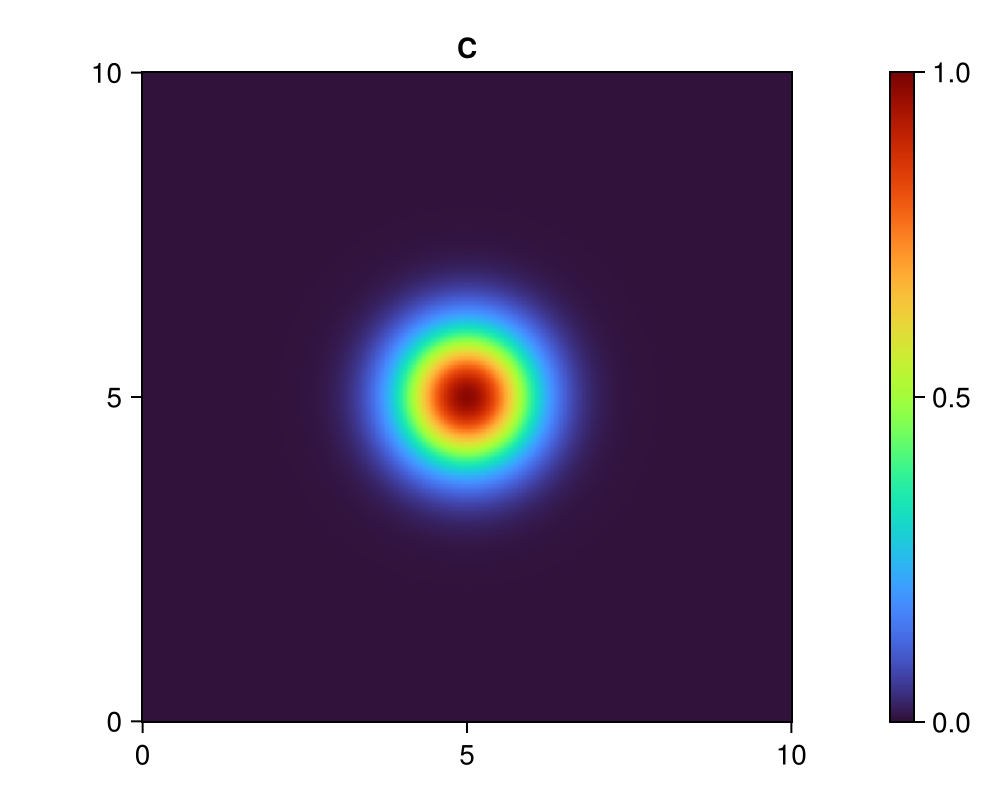

In [3]:
nprocs = (2, 2) # nprocs (x, y) dim
vizme2D_mpi(nprocs)